In [5]:
# Your code here
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError

# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep=",")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print("------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------\n")

------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------



In [9]:
print("------------------------(2). REVISO SI HAY DATOS DUPLICADOS----------------------------\n")
duplicados = df.duplicated()
numero_de_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS DEL DATASET SON: {numero_de_duplicados}")

------------------------(2). REVISO SI HAY DATOS DUPLICADOS----------------------------

LOS NUMEROS DUPLICADOS DEL DATASET SON: 0


In [10]:
print("------(3). CUENTO CUANTOS 'NaN' EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------\n") 
nan_counts = df.isnull().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

------(3). CUENTO CUANTOS 'NaN' EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------

CONTEO DE LOS 'NaN' POR COLUMNAS:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print("--------------------(4). IDENTIFICO VALORES FALTANTES-------------------------------\n")
Valores_faltantes = df.isna().sum() 
print("Valores faltantes por columna:\n", Valores_faltantes)

--------------------(4). IDENTIFICO VALORES FALTANTES-------------------------------

Valores faltantes por columna:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
print("-----------------(5). IDENTIFICO LAS COLUMNAS NUMERICAS-------------------\n")
columnas_numericas = df.select_dtypes(include=['number']).columns 
print("Variables numéricas:") 
print(columnas_numericas)

-----------------(5). IDENTIFICO LAS COLUMNAS NUMERICAS-------------------

Variables numéricas:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


--------(6). GRAFICO LAS VARIABLES CON RESPECTO A LA VARIABLE OBJETIVO PARA MIRAR RELACION----------


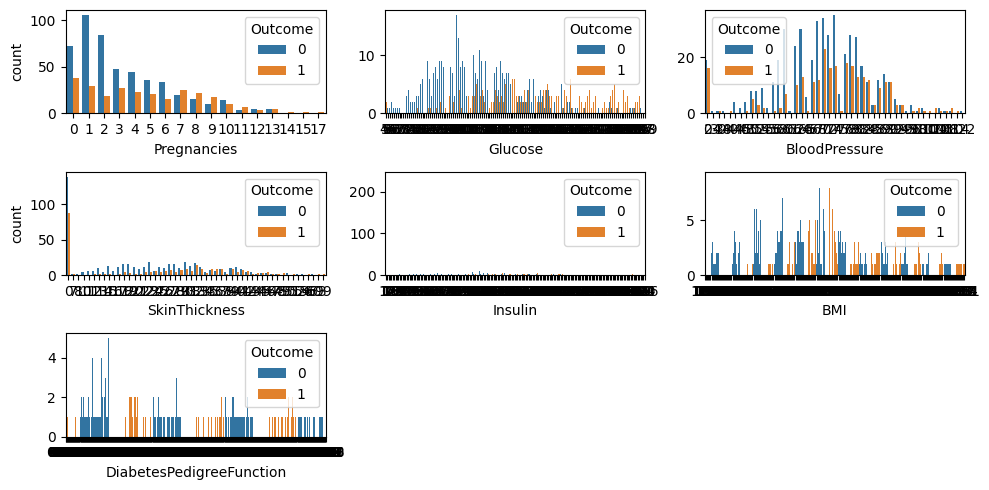

In [13]:
print("--------(6). GRAFICO LAS VARIABLES CON RESPECTO A LA VARIABLE OBJETIVO PARA MIRAR RELACION----------")
fig, axis = plt.subplots(3, 3, figsize = (10, 5))

sns.countplot(ax = axis[0, 0], data = df, x = "Pregnancies", hue = "Outcome")
sns.countplot(ax = axis[0, 1], data = df, x = "Glucose", hue = "Outcome").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "BloodPressure", hue = "Outcome").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "SkinThickness", hue = "Outcome")
sns.countplot(ax = axis[1, 1], data = df, x = "Insulin", hue = "Outcome").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = df, x = "BMI", hue = "Outcome").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction", hue = "Outcome").set(ylabel = None)


fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.tight_layout()
plt.show()

In [14]:
print("----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------\n")
df.isnull().sum().sort_values(ascending=False)

----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

--------(8). REALIZO GRAFICO DE MAPA DE CALOR PARA MIRAR CORRELACIONES-------------


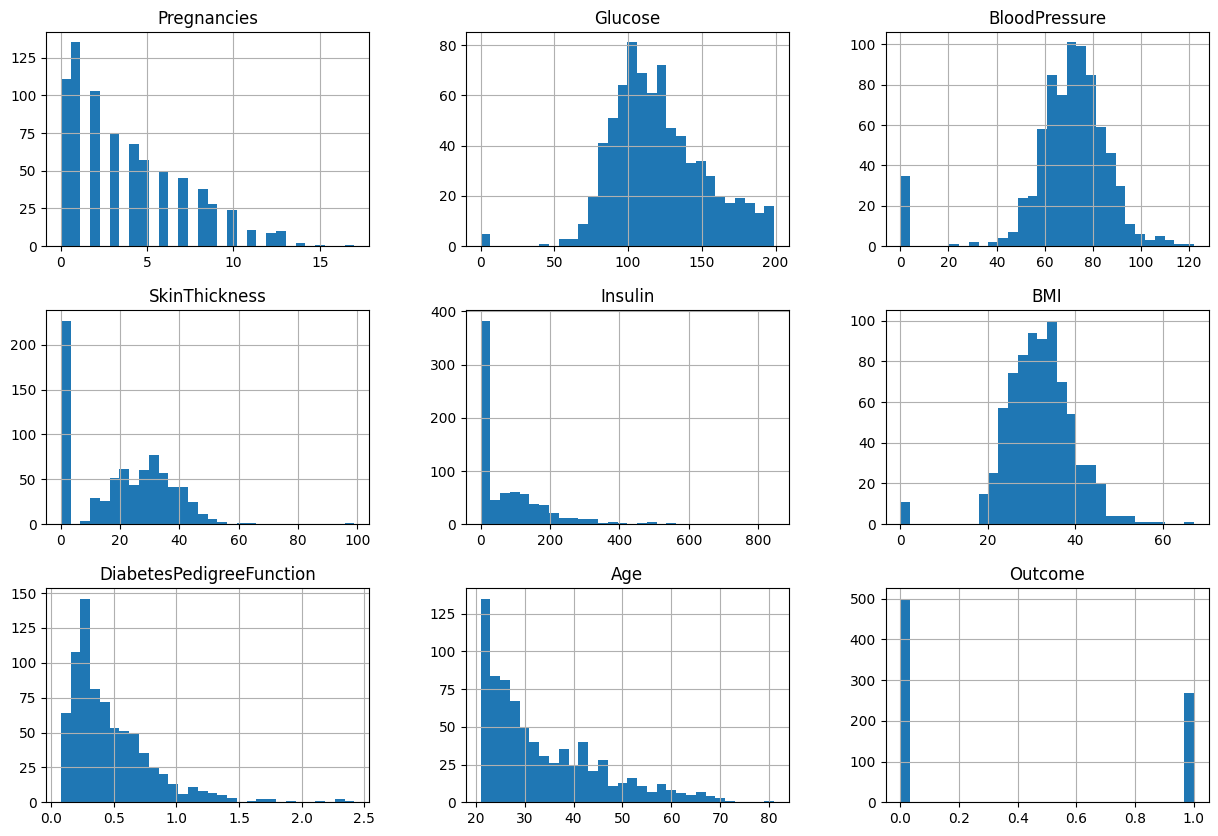

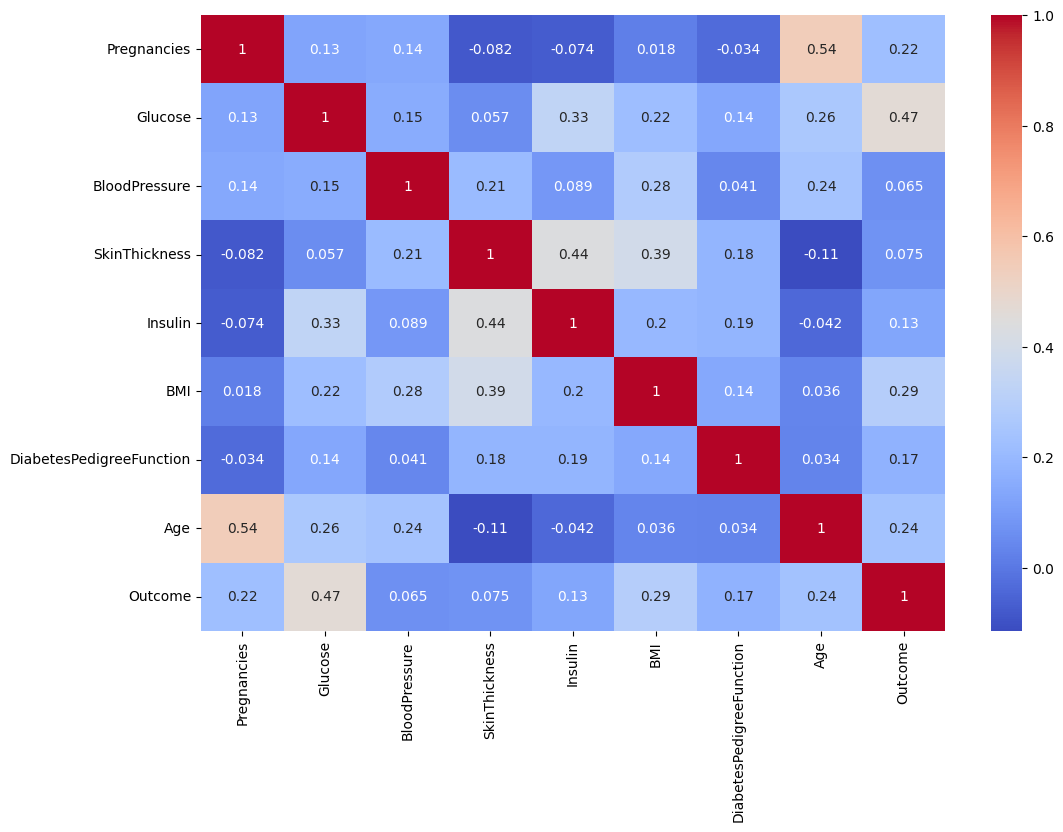

In [15]:
print("--------(8). REALIZO GRAFICO DE MAPA DE CALOR PARA MIRAR CORRELACIONES-------------")

# Distribuciones de las variables numéricas
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.show()

# Mapa de calor de la correlación
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


SE EVIDENCIA UNA RELACION ENTRE LA VARIABLE OBJETIVO Y LA GUCLOSA

In [16]:
print("----------------(9). CUENTO LA CANTIDAD DE FILAS POR VARIABLE QUE SUPERAN EL LIMITE SUPERIOR PARA REVISAR OUTLIERS-----------------\n")
# Identificar automáticamente las variables numéricas
numeric_features = df.select_dtypes(include=['number']).columns.tolist()

# Crear un DataFrame para almacenar los límites y los conteos
limits_list = []

# Diccionario para almacenar conteo de valores atípicos
outliers_count = {}

# Número total de filas en el dataset
total_rows = df.shape[0]

# Calcular los límites superiores e inferiores y contar valores atípicos
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 3.0 * IQR
    upper_limit = Q3 + 3.0 * IQR
    limits_list.append({'Atributos': feature, 'Limite Inferior': round(lower_limit,2), 'Limite Superior': round(upper_limit,2)})
    
    # Contar valores por encima del límite superior
    count_above_upper_limit = df[df[feature] > upper_limit].shape[0]
    percentage_above_upper_limit = (count_above_upper_limit / total_rows) * 100
    outliers_count[feature] = (count_above_upper_limit, percentage_above_upper_limit)

# Convertir la lista de límites a DataFrame
limits_df = pd.DataFrame(limits_list)

# Mostrar los límites calculados
print("Límites Calculados:")
print(limits_df)

# Mostrar el conteo de filas y el porcentaje que superan el límite superior por cada variable
print("\nConteo y Porcentaje de Filas que Superan el Límite Superior:")
for feature, (count, percentage) in outliers_count.items():
    print(f"{feature}: {count} filas ({percentage:.2f}%)")


----------------(9). CUENTO LA CANTIDAD DE FILAS POR VARIABLE QUE SUPERAN EL LIMITE SUPERIOR PARA REVISAR OUTLIERS-----------------

Límites Calculados:
                  Atributos  Limite Inferior  Limite Superior
0               Pregnancies           -14.00            21.00
1                   Glucose           -24.75           264.00
2             BloodPressure             8.00           134.00
3             SkinThickness           -96.00           128.00
4                   Insulin          -381.75           509.00
5                       BMI            -0.60            64.50
6  DiabetesPedigreeFunction            -0.90             1.77
7                       Age           -27.00            92.00
8                   Outcome            -3.00             4.00

Conteo y Porcentaje de Filas que Superan el Límite Superior:
Pregnancies: 0 filas (0.00%)
Glucose: 0 filas (0.00%)
BloodPressure: 0 filas (0.00%)
SkinThickness: 0 filas (0.00%)
Insulin: 9 filas (1.17%)
BMI: 1 filas (0.13%)
Dia

---------(10).  REALIZO GRAFICOS BOXPLOT PARA DETALLAR OUTLIERS----------


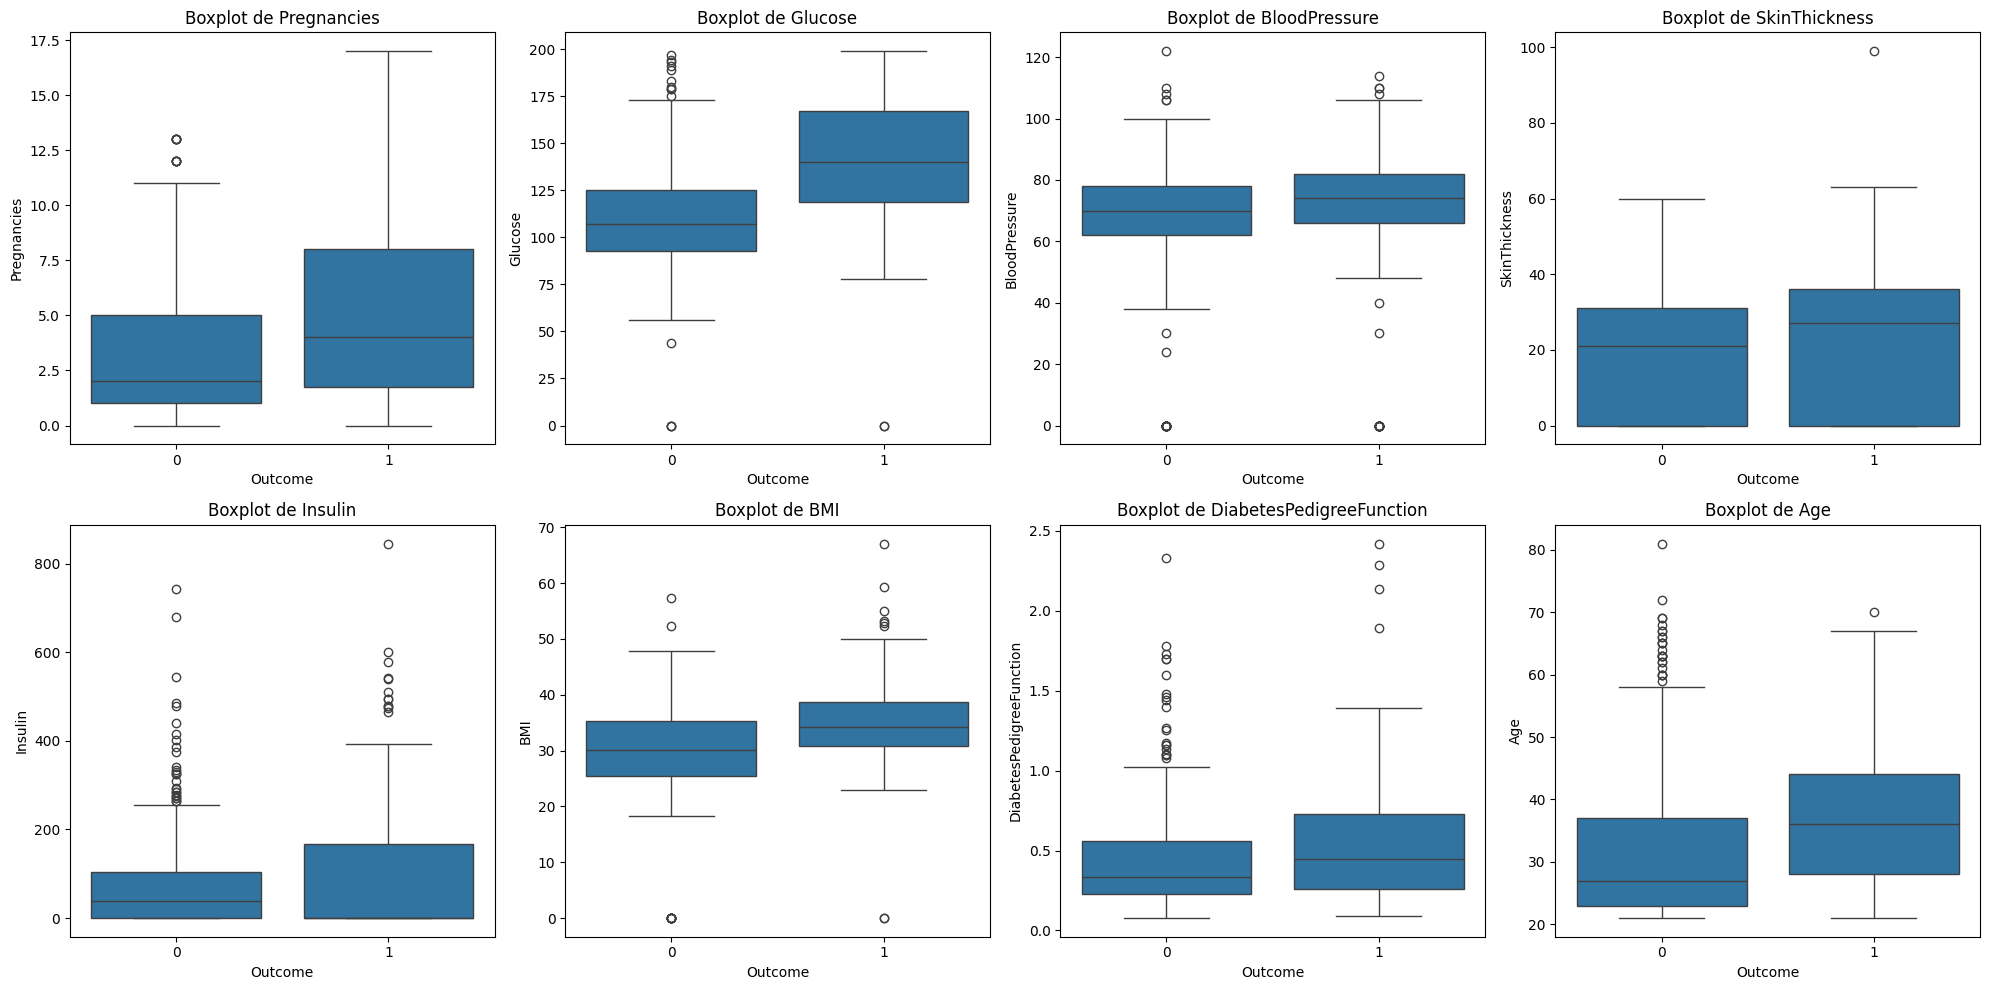

In [17]:
print("---------(10).  REALIZO GRAFICOS BOXPLOT PARA DETALLAR OUTLIERS----------")

# Lista de variables para graficar
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Graficar boxplots para cada variable
for i, var in enumerate(variables):
    sns.boxplot(x='Outcome', y=var, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
print("----------------(11) ELIMINO LAS VARIABLES QUE CONSIDERO TIENE RELACION CON LA PREDICCION DEL PACIENTE CON DIABETES------------")
df = df.drop(columns=['SkinThickness', 'BloodPressure'])
df

----------------(11) ELIMINO LAS VARIABLES QUE CONSIDERO TIENE RELACION CON LA PREDICCION DEL PACIENTE CON DIABETES------------


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [20]:
print("-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------



,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0.0,0.304,21
618,9,112,0,28.2,1.282,50
346,1,139,83,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,370,46.2,0.238,46


In [21]:
print("-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----\n")
# Identificar las variables numéricas automáticamente, excluyendo 'Outcome' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'Outcome']

# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplicar el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplicar el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Mostrar las primeras filas de los datos escalados de entrenamiento
print(X_train_final.head())

-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----

     Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
60     -0.526397 -1.151398 -0.701206 -4.135256                 -0.490735   
618     1.588046 -0.276643 -0.701206 -0.489169                  2.415030   
346    -0.828460  0.566871  0.013448 -0.424522                  0.549161   
294    -1.130523  1.254179 -0.701206 -1.303720                 -0.639291   
231     0.681856  0.410665  2.484601  1.838121                 -0.686829   

          Age  
60  -1.035940  
618  1.487101  
346 -0.948939  
294  2.792122  
231  1.139095  


In [22]:
print("-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------\n")
# Identificar variables categóricas automáticamente, como en este no hay aparecen en cero
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)

-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------

Variables categóricas:
[]


In [23]:
print("--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------\n")
# Con un valor de k = 6
selection_model = SelectKBest(score_func=f_classif, k = 6)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------



,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,2.484601,1.838121,-0.686829,1.139095


In [24]:
X_test_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.714020,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,-0.701206,-0.269369,-0.770021,1.487101


In [25]:
print("----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------\n")
# Obtener las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Crear un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Mostrar las 30 mejores características con sus puntuaciones 

scores_df

----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------



,Características,Puntuaciones
1,Glucose,160.769030
3,BMI,63.378414
5,Age,52.326951
0,Pregnancies,27.550001
4,DiabetesPedigreeFunction,14.977704
2,Insulin,7.290108


In [26]:
print("------------(17). MODELO DE ARBOL DE DECISION-------------")
model1 = DecisionTreeClassifier(random_state = 42)

------------(17). MODELO DE ARBOL DE DECISION-------------


In [27]:
print("--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------")
model1.fit(X_train_sel, y_train)

--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------


DecisionTreeClassifier(random_state=42)

--------------(19). GRAFICO EL ARBOL------------


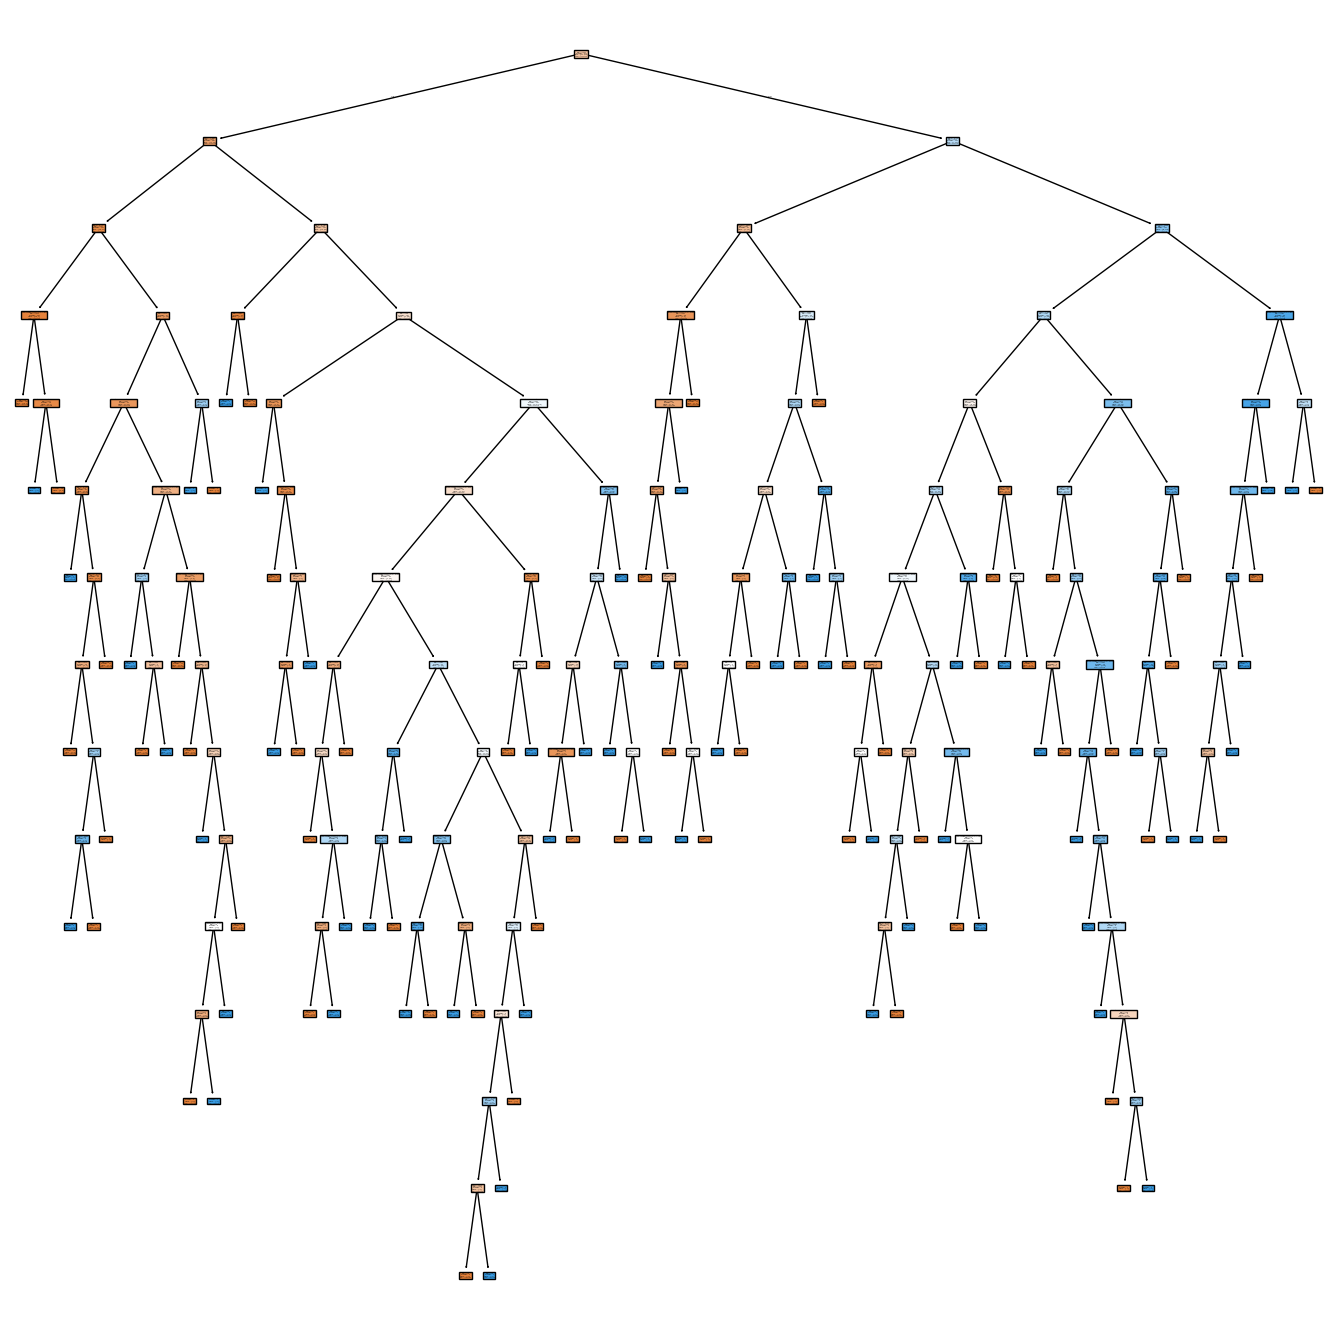

In [28]:
print("--------------(19). GRAFICO EL ARBOL------------")
ig = plt.figure(figsize=(17,17))

tree.plot_tree(model1, feature_names = list(X_train_sel.columns), class_names = ["Negativo", "Positivo"], filled = True)

plt.show()

In [29]:
print("--------------(20). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------")
# predicción
y_pred_test = model1.predict(X_test_sel)
y_pred_test

--------------(20). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------


array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [30]:
print("------------(21). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------")
# predicción
y_pred_train = model1.predict(X_train_sel)
y_pred_train

------------(21). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [31]:
print("--------------(22). REALIZO METRICAS PARA MEDIR EL LOS DATOS DE ENTRENAMIENTO Y PRUEBA----------")
# metricas el modelo inicial sin ajustes
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test inicial: ", accuracy_test)
print("F1 score Test inicial: ", f1_score_test)
print("Precision Test inicial: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train inicial: ", accuracy_train)
print("F1 score Train inicial: ", f1_score_train)
print("Precision Train inicial: ", precision_train)
print("Recall Train inicial: ", recall_train)

--------------(22). REALIZO METRICAS PARA MEDIR EL LOS DATOS DE ENTRENAMIENTO Y PRUEBA----------
Accuracy Test inicial:  0.7142857142857143
F1 score Test inicial:  0.7142857142857143
Precision Test inicial:  0.7142857142857143
Recall Test:  0.7142857142857143
Accuracy Train inicial:  1.0
F1 score Train inicial:  1.0
Precision Train inicial:  1.0
Recall Train inicial:  1.0


In [32]:
print("----------(23). COMPARAMOS LAS METRICAS DE LA PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["Negativo", "Positivo"]))

----------(23). COMPARAMOS LAS METRICAS DE LA PRUEBA-------------
              precision    recall  f1-score   support

    Negativo       0.83      0.70      0.76        99
    Positivo       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



In [33]:
print("----------(24). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["Negativo", "Positivo"]))

----------(24). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO-------------
              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       401
    Positivo       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



EN EL CONJUNTO DE PRUEBA DE LA CLASE NEGATIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.83: De todos los casos que el modelo predijo como negativos, el 83% eran realmente negativos.
Recall: 0.70: De todos los casos que eran realmente negativos, el modelo identificó correctamente el 70%.
F1-Score: 0.76: Un balance entre precisión y recall, indicando un rendimiento razonablemente equilibrado para la clase negativa en el conjunto de prueba.

EN EL CONJUNTO DE PRUEBA DE LA CLASE POSITIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.58: De todos los casos que el modelo predijo como positivos, solo el 58% eran realmente positivos. Esto indica un alto número de falsos positivos.
Recall: 0.75: De todos los casos que eran realmente positivos, el modelo identificó correctamente el 75%. Esto es bastante bueno y sugiere que el modelo está capturando una buena cantidad de casos positivos reales.
F1-Score: 0.65: Indica un rendimiento moderado para la clase positiva, con cierta desventaja en precisión.

EN EL CONJUNTO DE ENTRENAMIENTO TANTO PARA LA CLASE DE NEGATIVOS COMO POSITIVOS EL MODELO ESTABA OVERFITIANDO.

In [34]:
print("-----------(25). DEFINO LOS PARAMETROS A MANO PARA LA REGULARIZACION-----------")
# Defini la rejilla de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 20, 30, 35],
    'min_samples_leaf': [1, 2, 4, 8, 10, 20, 30]
}

-----------(25). DEFINO LOS PARAMETROS A MANO PARA LA REGULARIZACION-----------


In [35]:
print("--------------(26). CONFIGURO Y EJECUTO EL GRIDSEARCH--------------")
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train_sel, y_train)

# Obtener el mejor modelo encontrado por GridSearchCV
model2 = grid_search.best_estimator_

print(f'LOS MEJORES PARAMETROS DEL (GridSearchCV) SON: {grid_search.best_params_}')


--------------(26). CONFIGURO Y EJECUTO EL GRIDSEARCH--------------


LOS MEJORES PARAMETROS DEL (GridSearchCV) SON: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [36]:
print("---------------(27). REALIZO LAS PREDICCIONES DEL ENTRENAMIENTO Y PRUEBA CON PARAMETROS AJUSTADOS--------")
# Predicciones y evaluación del modelo optimizado en el conjunto de prueba
y_pred_test_hp = model2.predict(X_test_sel)
y_pred_train_hp = model2.predict(X_train_sel)

accuracy_test = accuracy_score(y_test, y_pred_test_hp)
accuracy_train = accuracy_score(y_train, y_pred_train_hp)

f1_score_test = f1_score(y_test, y_pred_test_hp, average='micro')
f1_score_train = f1_score(y_train, y_pred_train_hp, average='micro')

precision_test = precision_score(y_test, y_pred_test_hp, average='micro')
precision_train = precision_score(y_train, y_pred_train_hp, average='micro')

recall_test = recall_score(y_test, y_pred_test_hp, average='micro')
recall_train = recall_score(y_train, y_pred_train_hp, average='micro')

print("Accuracy Test ajustado: ", accuracy_test)
print("F1 score Test ajustado: ", f1_score_test)
print("Precision Test ajustado: ", precision_test)
print("Recall Test ajustado: ", recall_test)

print("Accuracy Train ajustado: ", accuracy_train)
print("F1 score Train ajustado: ", f1_score_train)
print("Precision Train ajustado: ", precision_train)
print("Recall Train ajustado: ", recall_train)

---------------(27). REALIZO LAS PREDICCIONES DEL ENTRENAMIENTO Y PRUEBA CON PARAMETROS AJUSTADOS--------
Accuracy Test ajustado:  0.7532467532467533
F1 score Test ajustado:  0.7532467532467533
Precision Test ajustado:  0.7532467532467533
Recall Test ajustado:  0.7532467532467533
Accuracy Train ajustado:  0.8241042345276873
F1 score Train ajustado:  0.8241042345276873
Precision Train ajustado:  0.8241042345276873
Recall Train ajustado:  0.8241042345276873


In [37]:
print("----------(28). COMPARAMOS LAS METRICAS DE LA PRUEBA CON PARAMETROS-------------")
print(classification_report(y_test, y_pred_test_hp, target_names=["Negativo", "Positivo"]))

----------(28). COMPARAMOS LAS METRICAS DE LA PRUEBA CON PARAMETROS-------------
              precision    recall  f1-score   support

    Negativo       0.84      0.77      0.80        99
    Positivo       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [38]:
print("----------(29). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO CON PARAMETROS-------------")
print(classification_report(y_train, y_pred_train_hp, target_names=["Negativo", "Positivo"]))

----------(29). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO CON PARAMETROS-------------
              precision    recall  f1-score   support

    Negativo       0.88      0.85      0.86       401
    Positivo       0.73      0.78      0.75       213

    accuracy                           0.82       614
   macro avg       0.80      0.81      0.81       614
weighted avg       0.83      0.82      0.83       614



-----------------------------------------------CONCLUSION------------------------------------------ 


DESPUES DE REGULARIZAR LOS PARAMETROS DEL MODELO DE ARBOL DE DECISIÒN CON PARAMETROS A MANO NOS AROJA LAS SIGUIENTES METRICAS.

EN EL CONJUNTO DE PRUEBA DE LA CLASE NEGATIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.88: De todos los casos que el modelo predijo como negativos, el 88% eran realmente negativos.
Recall: 0.85: De todos los casos que eran realmente negativos, el modelo identificó correctamente el 85%.
F1-Score: 0.86: Un balance entre precisión y recall, indicando un rendimiento razonablemente equilibrado para la clase negativa en el conjunto de prueba.

EN EL CONJUNTO DE PRUEBA DE LA CLASE POSITIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.73: De todos los casos que el modelo predijo como positivos, el 73% eran realmente positivos. Esto indica que el modelo ajusto las clases.
Recall: 0.78: De todos los casos que eran realmente positivos, el modelo identificó correctamente el 78%. Esto es bastante bueno y sugiere que el modelo está capturando una buena cantidad de casos positivos reales.
F1-Score: 0.75: Indica una mejora para la clase positiva.

EN EL CONJUNTO DE ENTRENAMIENTO EL MODELO DEJO DE OVERFITIAR DANDO VALORES MAS AJUSTADOS PARA UNA COMPARACION CON EL TEST.

In [41]:

# Define la ruta en tu codespace de GitHub
train_path = '/workspaces/Proyecto-arbol-de-decision-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_train.csv'
test_path = '/workspaces/Proyecto-arbol-de-decision-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_test.csv'

# Asegúrate de que las carpetas en la ruta existen
os.makedirs(os.path.dirname(train_path), exist_ok=True)
os.makedirs(os.path.dirname(test_path), exist_ok=True)

# Guarda x_train_final en la ruta especificada
X_train_final.to_csv(train_path, index=False)

# Guarda x_test_final en la ruta especificada
X_test_final.to_csv(test_path, index=False)

print("Datos de entrenamiento y prueba guardados exitosamente en 'data/processed'.")


Datos de entrenamiento y prueba guardados exitosamente en 'data/processed'.
